In [166]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
data = pd.read_csv("data.csv")
df = pd.DataFrame(data)
df

,Index,Country,Accounts,Global Share,Accounts per 100 Capita,Android,iOS,Picture,Status,Business,Companions
0,1,India,"749,075,246",21.67,52.32,94.95,5.05,62.22,29.55,9.77,6.20
1,2,Indonesia,"235,245,077",6.81,84.01,92.35,7.65,49.14,27.49,10.66,9.30
2,3,Brazil,"206,949,224",5.99,98.22,81.42,18.58,61.08,41.46,10.32,15.55
3,4,United States,"137,859,284",3.99,40.25,32.62,67.38,44.03,32.77,2.39,6.12
4,5,Russian Federation,"132,855,022",3.84,91.20,75.60,24.40,61.74,33.47,3.62,9.40
...,...,...,...,...,...,...,...,...,...,...,...
230,231,Norfolk Island,300,0.00,NaN,51.21,48.79,38.00,21.67,0.33,6.33
231,232,AC,163,0.00,NaN,91.93,8.07,61.35,12.27,5.52,1.23
232,233,Niue,90,0.00,4.50,81.58,18.42,11.11,52.22,6.67,0.00
233,234,Tokelau,33,0.00,1.65,81.82,18.18,51.52,3.03,3.03,0.00


## 1. Data Cleaning 

In [168]:
df.columns

Index(['Index', 'Country', 'Accounts', 'Global Share',
       'Accounts per 100 Capita', 'Android', 'iOS', 'Picture', 'Status',
       'Business', 'Companions'],
      dtype='object')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Index                    235 non-null    int64  
 1   Country                  235 non-null    object 
 2   Accounts                 235 non-null    object 
 3   Global Share             235 non-null    float64
 4   Accounts per 100 Capita  232 non-null    float64
 5   Android                  235 non-null    float64
 6   iOS                      235 non-null    float64
 7   Picture                  235 non-null    float64
 8   Status                   235 non-null    float64
 9   Business                 235 non-null    float64
 10  Companions               235 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 20.3+ KB


In [170]:
df.describe(include='all')

,Index,Country,Accounts,Global Share,Accounts per 100 Capita,Android,iOS,Picture,Status,Business,Companions
count,235.000000,235,235,235.000000,232.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
unique,NaN,235,235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,India,"749,075,246",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,118.000000,NaN,NaN,0.425234,61.516379,74.512085,25.487915,55.701957,25.222979,8.428085,7.774340
std,67.982841,NaN,NaN,1.618805,46.282486,17.577656,17.577656,10.733888,11.195075,7.747828,6.314697
min,1.000000,NaN,NaN,0.000000,0.000000,29.940000,1.050000,11.110000,2.620000,0.000000,0.000000
25%,59.500000,NaN,NaN,0.010000,27.170000,65.430000,10.565000,48.765000,18.485000,2.150000,3.440000
50%,118.000000,NaN,NaN,0.070000,56.815000,77.960000,22.040000,54.300000,24.660000,6.270000,6.390000
75%,176.500000,NaN,NaN,0.240000,90.750000,89.435000,34.570000,62.240000,31.210000,11.480000,10.300000


In [171]:
df.isna().sum()

Index                      0
Country                    0
Accounts                   0
Global Share               0
Accounts per 100 Capita    3
Android                    0
iOS                        0
Picture                    0
Status                     0
Business                   0
Companions                 0
dtype: int64

In [172]:
df[df['Accounts per 100 Capita'].isna()]

,Index,Country,Accounts,Global Share,Accounts per 100 Capita,Android,iOS,Picture,Status,Business,Companions
229,230,British Indian Ocean Territory,309,0.0,NaN,82.09,17.91,46.28,9.71,11.00,3.56
230,231,Norfolk Island,300,0.0,NaN,51.21,48.79,38.00,21.67,0.33,6.33
231,232,AC,163,0.0,NaN,91.93,8.07,61.35,12.27,5.52,1.23


In [173]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)
df.head()

,index,country,accounts,global_share,accounts_per_100_capita,android,ios,picture,status,business,companions
0,1,India,"749,075,246",21.67,52.32,94.95,5.05,62.22,29.55,9.77,6.20
1,2,Indonesia,"235,245,077",6.81,84.01,92.35,7.65,49.14,27.49,10.66,9.30
2,3,Brazil,"206,949,224",5.99,98.22,81.42,18.58,61.08,41.46,10.32,15.55
3,4,United States,"137,859,284",3.99,40.25,32.62,67.38,44.03,32.77,2.39,6.12
4,5,Russian Federation,"132,855,022",3.84,91.20,75.60,24.40,61.74,33.47,3.62,9.40


In [174]:
df['accounts'] = df['accounts'].str.replace(',', '').astype(int)

## 2. Feature Engg

In [175]:
import pycountry_convert as pc

def country_to_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return continent_code
    except:
        return "OTHER"

df["continent"] = df["country"].apply(country_to_continent)

In [176]:
df.to_csv("clean_whatsapp_data.csv", index=False)

## 3. Analysis

In [215]:
# compute the top countries by penetration (per 100).
top_penetration = df.groupby("country")['accounts_per_100_capita'].sum().sort_values(ascending=False).head(5)
top_penetration

country
Monaco                       480.01
United Arab Emirates         175.67
Sint Maarten (Dutch part)    142.74
Qatar                        141.51
Cayman Islands               138.78
Name: accounts_per_100_capita, dtype: float64

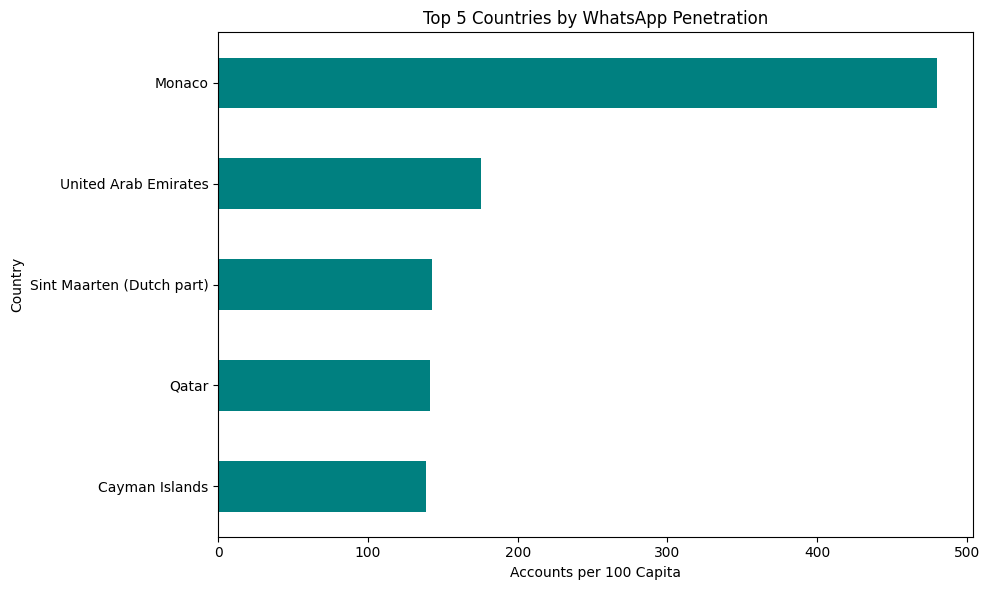

In [196]:
plt.figure(figsize=(10,6))
top_penetration.plot(kind='barh', color='teal')
plt.xlabel("Accounts per 100 Capita")
plt.ylabel("Country")
plt.title("Top 5 Countries by WhatsApp Penetration")
plt.gca().invert_yaxis()  
plt.savefig("Charts/top_countries_penetration.png", dpi=300)
plt.show()

In [178]:
# Which countries dominate WhatsApp usage globally? 
top_countries = df.groupby("country").agg(
    total_accounts=('accounts', 'sum'),
    global_share=('global_share', 'mean')
).reset_index().sort_values(by = "total_accounts" ,ascending=False).head(5)
top_countries

,country,total_accounts,global_share
96,India,749075246,21.67
97,Indonesia,235245077,6.81
29,Brazil,206949224,5.99
222,United States,137859284,3.99
173,Russian Federation,132855022,3.84


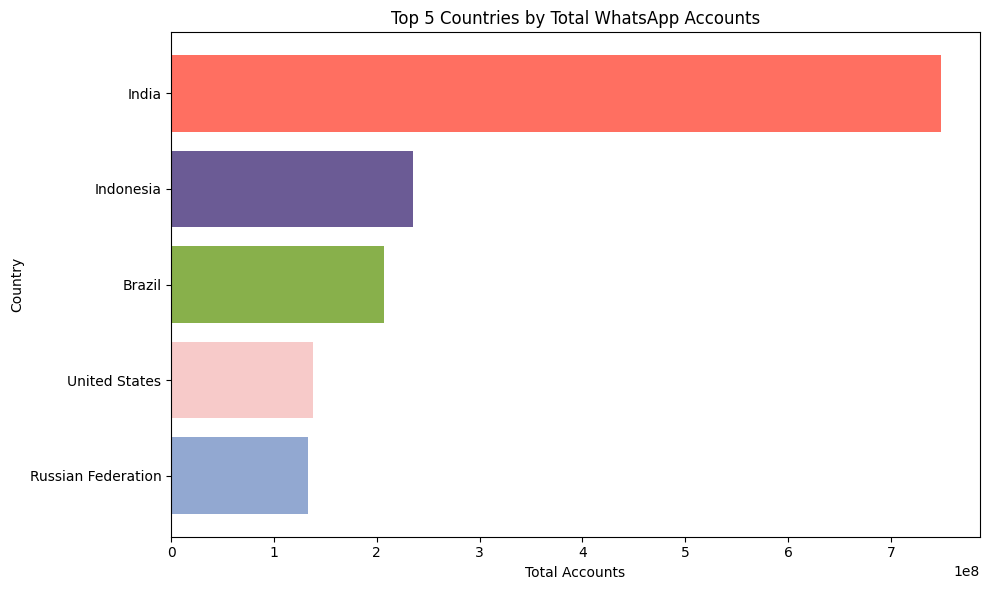

In [198]:
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']

plt.figure(figsize=(10,6))
plt.barh(top_countries['country'], top_countries['total_accounts'], color=colors)
plt.xlabel("Total Accounts")
plt.ylabel("Country")
plt.title("Top 5 Countries by Total WhatsApp Accounts")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.savefig("Charts/top_countries_total_accounts.png", dpi=300)
plt.show()

In [179]:
# Which countries have unusually high WhatsApp penetration?
unusual_countries = df.groupby("country")['accounts_per_100_capita'].sum().sort_values(ascending=False)
top_unusual = unusual_countries.head(10)
top_unusual

country
Monaco                       480.01
United Arab Emirates         175.67
Sint Maarten (Dutch part)    142.74
Qatar                        141.51
Cayman Islands               138.78
Turks and Caicos Islands     133.65
Saint Kitts and Nevis        130.83
Hong Kong                    130.57
Anguilla                     128.36
Montserrat                   125.40
Name: accounts_per_100_capita, dtype: float64

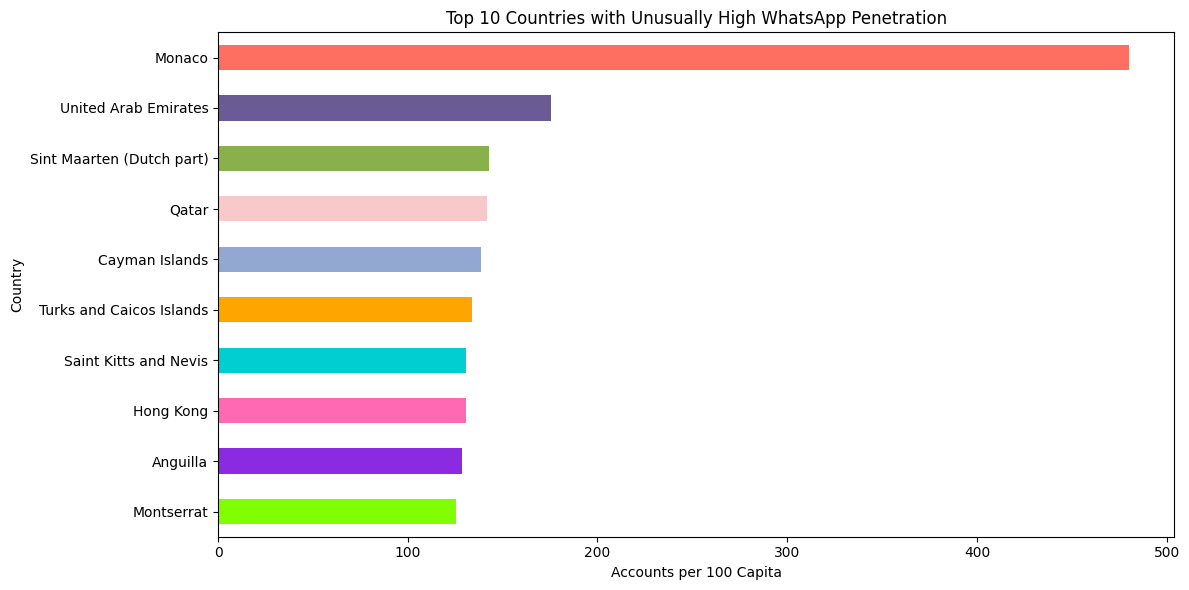

In [199]:
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#FFA500', '#00CED1', '#FF69B4', '#8A2BE2', '#7FFF00']
plt.figure(figsize=(12,6))
top_unusual.plot(kind='barh', color=colors)
plt.xlabel("Accounts per 100 Capita")
plt.ylabel("Country")
plt.title("Top 10 Countries with Unusually High WhatsApp Penetration")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("Charts/top_10_high_penetration.png", dpi=300)
plt.show()

In [216]:
# OS usage by continent
os_share = df.groupby("continent").agg(
    android_usage=("android", "sum"),
    ios_usage=("ios", "sum")
).reset_index()
os_share

,continent,android_usage,ios_usage
0,AF,5009.19,490.81
1,AS,3631.34,1368.66
2,EU,2793.11,1906.89
3,NA,2628.81,1071.19
4,OC,1676.29,723.71
5,OTHER,596.60,203.40
6,SA,1175.00,225.00


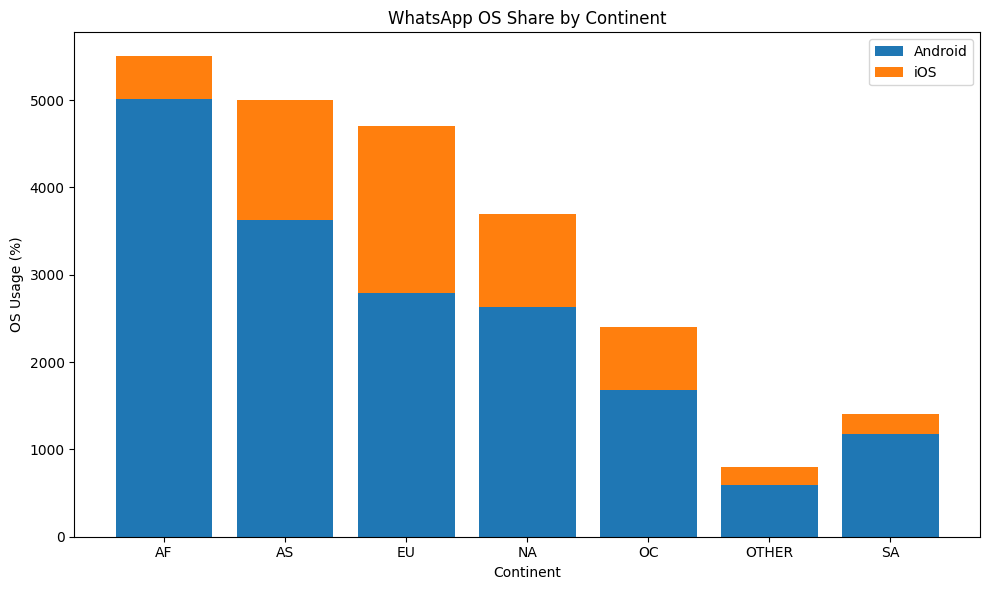

In [201]:
plt.figure(figsize=(10,6))
plt.bar(os_share['continent'], os_share['android_usage'], color='#1f77b4', label='Android')
plt.bar(os_share['continent'], os_share['ios_usage'], bottom=os_share['android_usage'], color='#ff7f0e', label='iOS')
plt.xlabel("Continent")
plt.ylabel("OS Usage (%)")
plt.title("WhatsApp OS Share by Continent")
plt.legend()
plt.tight_layout()
plt.savefig("Charts/os_share_by_continent.png", dpi=300)
plt.show()

In [202]:
# How many users have linked devices 
companions_accounts = df.groupby('companions')['accounts'].sum().reset_index()

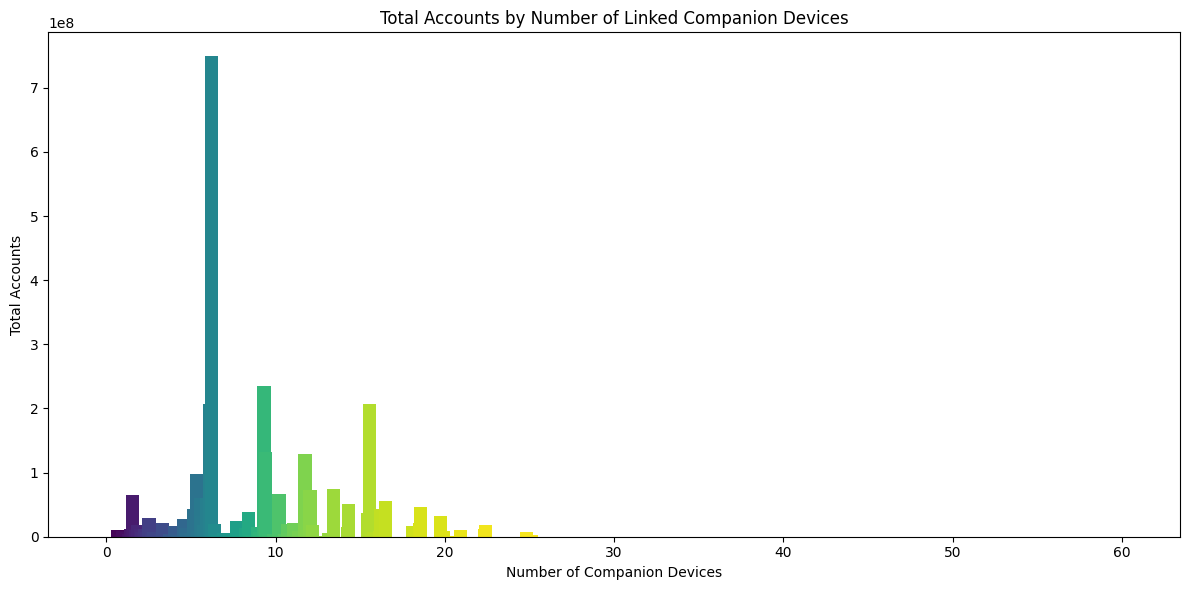

In [203]:
colors = sns.color_palette("viridis", len(companions_accounts))
plt.figure(figsize=(12,6))
plt.bar(companions_accounts['companions'], companions_accounts['accounts'], color=colors)
plt.xlabel("Number of Companion Devices")
plt.ylabel("Total Accounts")
plt.title("Total Accounts by Number of Linked Companion Devices")
plt.tight_layout()
plt.savefig("Charts/companions_distribution.png", dpi=300)
plt.show()

In [217]:
# Are privacy behaviors different by region?
privacy_df = df.groupby('continent').agg(
    picture_usage=("picture", "sum"),
    status_usage=("status", "sum")
).reset_index()
privacy_df

,continent,picture_usage,status_usage
0,AF,3635.10,997.96
1,AS,2668.93,1229.72
2,EU,2556.43,1676.70
3,NA,1880.42,1025.91
4,OC,1161.45,406.66
5,OTHER,461.00,199.99
6,SA,726.63,390.46


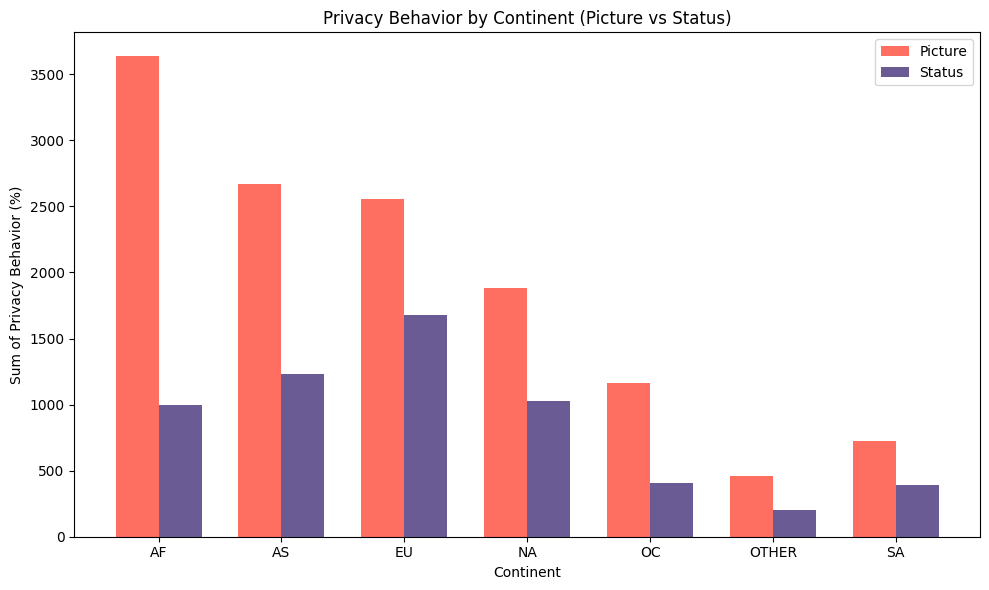

In [205]:
x = np.arange(len(privacy_df['continent']))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, privacy_df['picture_usage'], width, label='Picture', color='#FF6F61')
plt.bar(x + width/2, privacy_df['status_usage'], width, label='Status', color='#6B5B95')
plt.xticks(x, privacy_df['continent'])
plt.xlabel("Continent")
plt.ylabel("Sum of Privacy Behavior (%)")
plt.title("Privacy Behavior by Continent (Picture vs Status)")
plt.legend()
plt.tight_layout()
plt.savefig("Charts/privacy_behavior_by_continent.png", dpi=300)
plt.show()

In [218]:
# Which countries use WhatsApp Business the most?
top_business = df.groupby('country')['business'].sum().sort_values(ascending=False).head(5)
top_business

country
Sierra Leone                             34.68
Burundi                                  33.72
Rwanda                                   31.88
Congo, The Democratic Republic of the    29.45
Haiti                                    28.90
Name: business, dtype: float64

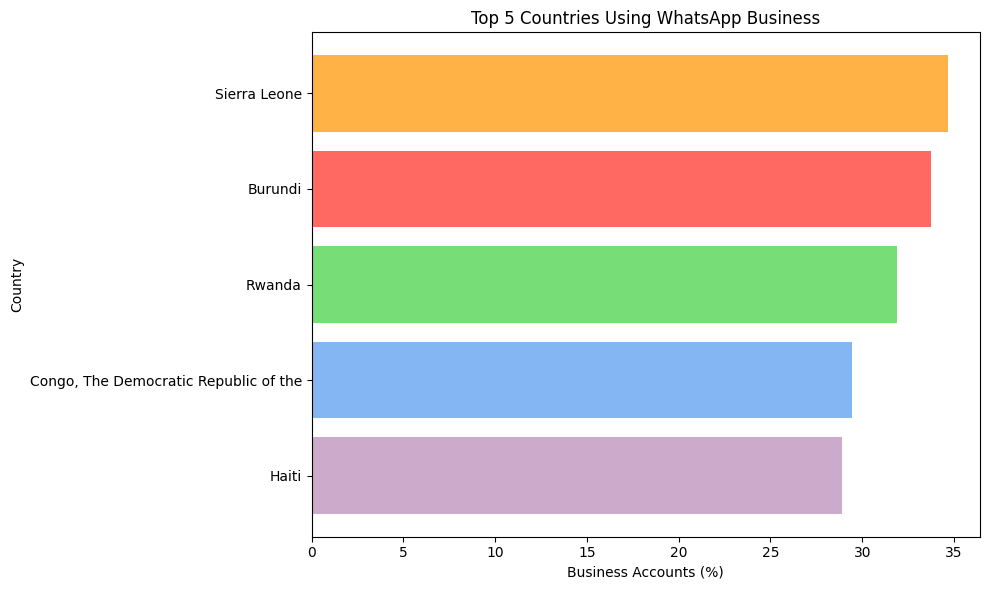

In [207]:
colors = ['#FFB347', '#FF6961', '#77DD77', '#84B6F4', '#CBAACB']
plt.figure(figsize=(10,6))
plt.barh(top_business.index, top_business.values, color=colors)
plt.xlabel("Business Accounts (%)")
plt.ylabel("Country")
plt.title("Top 5 Countries Using WhatsApp Business")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.savefig("Charts/top_countries_business.png", dpi=300)
plt.show()

In [184]:
# Do companion devices correlate with platform type
df['android'].corr(df["companions"])

np.float64(-0.33428752084997587)

In [185]:
df['ios'].corr(df["companions"])

np.float64(0.3342875208499759)

In [186]:
# Are large countries (by accounts) more or less privacy-conscious?
accounts_mean = df['accounts'].mean()

large_countries_df = df[df['accounts'] > accounts_mean]
small_countries_df = df[df['accounts'] <= accounts_mean]
large_avg_picture = large_countries_df['picture'].mean()
small_avg_picture = small_countries_df['picture'].mean()

large_avg_status = large_countries_df['status'].mean()
small_avg_status = small_countries_df['status'].mean()

print("Average Picture visibility:")
print("Large countries:", large_avg_picture)
print("Small countries:", small_avg_picture)

print("\nAverage Status visibility:")
print("Large countries:", large_avg_status)
print("Small countries:", small_avg_status)


Average Picture visibility:
Large countries: 54.462
Small countries: 55.956307692307696

Average Status visibility:
Large countries: 29.312
Small countries: 24.384205128205128


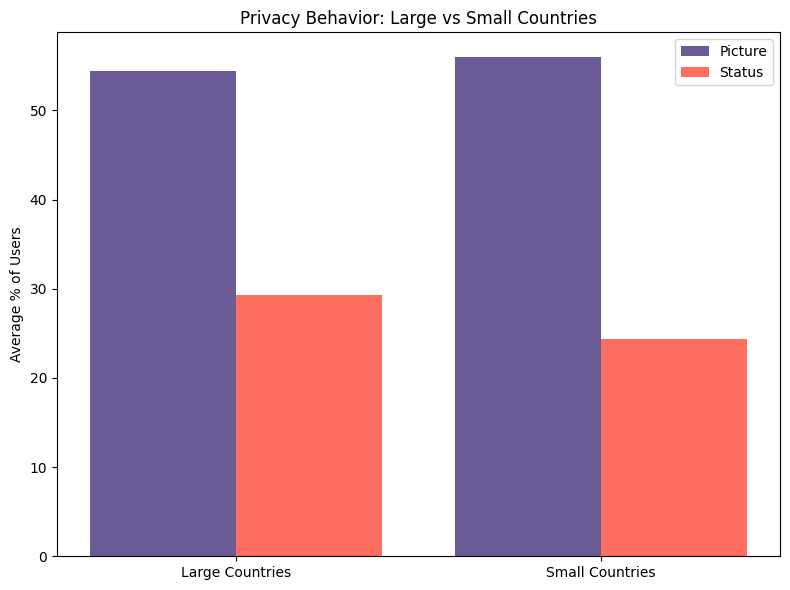

In [208]:
categories = ['Large Countries', 'Small Countries']
picture_values = [large_avg_picture, small_avg_picture]
status_values = [large_avg_status, small_avg_status]

x = range(len(categories))
plt.figure(figsize=(8,6))
plt.bar(x, picture_values, width=0.4, label='Picture', color='#6B5B95', align='center')
plt.bar([i + 0.4 for i in x], status_values, width=0.4, label='Status', color='#FF6F61', align='center')
plt.xticks([i + 0.2 for i in x], categories)
plt.ylabel("Average % of Users")
plt.title("Privacy Behavior: Large vs Small Countries")
plt.legend()
plt.tight_layout()
plt.savefig("Charts/privacy_large_vs_small.png", dpi=300)
plt.show()

## 4. Outliers and anomalies

In [187]:
# Countries with <10M accounts but >100 per capita (small islands). 
outlier1 = df[(df['accounts']< 1_000_000) & (df['accounts_per_100_capita'] > 100) ]
top_outlier1  = outlier1.sort_values(by='accounts_per_100_capita',ascending=False).head(5)
top_outlier_country = top_outlier1['country']
top_outlier_country

178                       Monaco
201    Sint Maarten (Dutch part)
192               Cayman Islands
200     Turks and Caicos Islands
199        Saint Kitts and Nevis
Name: country, dtype: object

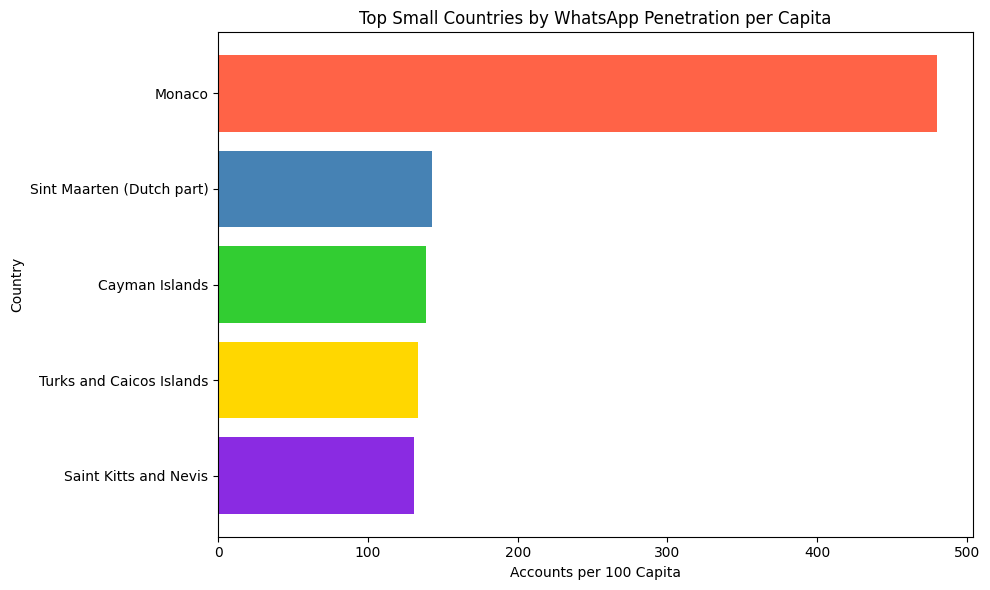

In [209]:
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2']

plt.figure(figsize=(10,6))
plt.barh(top_outlier1['country'], top_outlier1['accounts_per_100_capita'], color=colors)
plt.xlabel("Accounts per 100 Capita")
plt.ylabel("Country")
plt.title("Top Small Countries by WhatsApp Penetration per Capita")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.savefig("Charts/small_countries_high_penetration.png", dpi=300)
plt.show()

In [188]:
# Top 3_continents where iOS > Android (rare globally). 
ios_dominant = df[df['ios'] > df['android']]
top_ios_countries = ios_dominant.sort_values(by='accounts', ascending=False).head(3)
top_3_continents = top_ios_countries['continent']
top_3_continents

3     NA
10    EU
26    NA
Name: continent, dtype: object

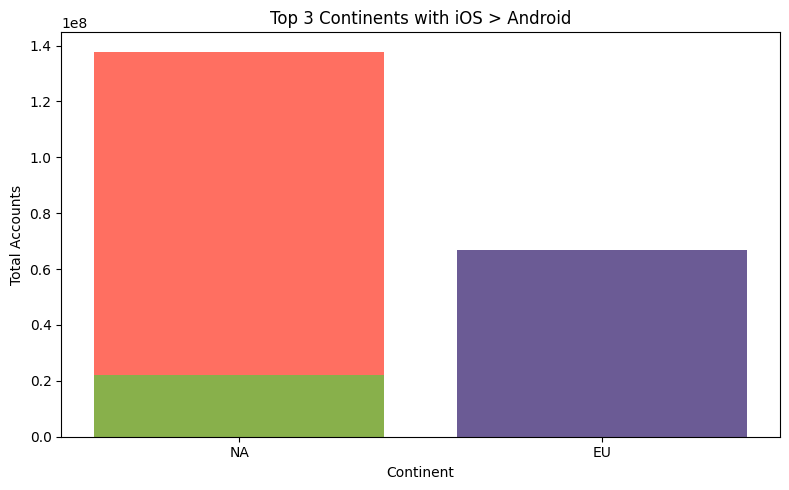

In [213]:
continents = top_ios_countries['continent']
accounts = top_ios_countries['accounts']

colors = ['#FF6F61', '#6B5B95', '#88B04B']
plt.figure(figsize=(8,5))
plt.bar(continents, accounts, color=colors)
plt.xlabel("Continent")
plt.ylabel("Total Accounts")
plt.title("Top 3 Continents with iOS > Android")
plt.tight_layout()
plt.savefig("Charts/top_ios_continents.png", dpi=300)
plt.show()

In [189]:
# Countries with extremely high companions. 
# max_companions = 60
high_comp_thresh = 50
high_companions = df[df['companions']> high_comp_thresh]
high_companions_country = high_companions['country']
high_companions_country

234    North Korea
Name: country, dtype: object

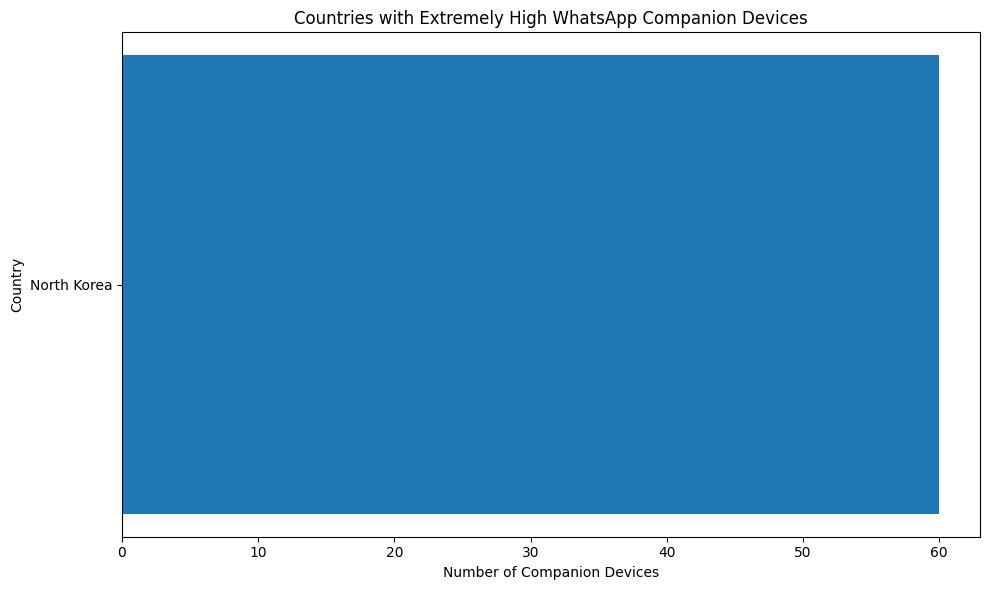

In [214]:
colors = plt.cm.tab20(np.arange(len(high_companions)))

plt.figure(figsize=(10,6))
plt.barh(high_companions['country'], high_companions['companions'], color=colors)
plt.xlabel("Number of Companion Devices")
plt.ylabel("Country")
plt.title("Countries with Extremely High WhatsApp Companion Devices")
plt.gca().invert_yaxis() 
plt.tight_layout()

plt.savefig("Charts/high_companion_countries.png", dpi=300)
plt.show()

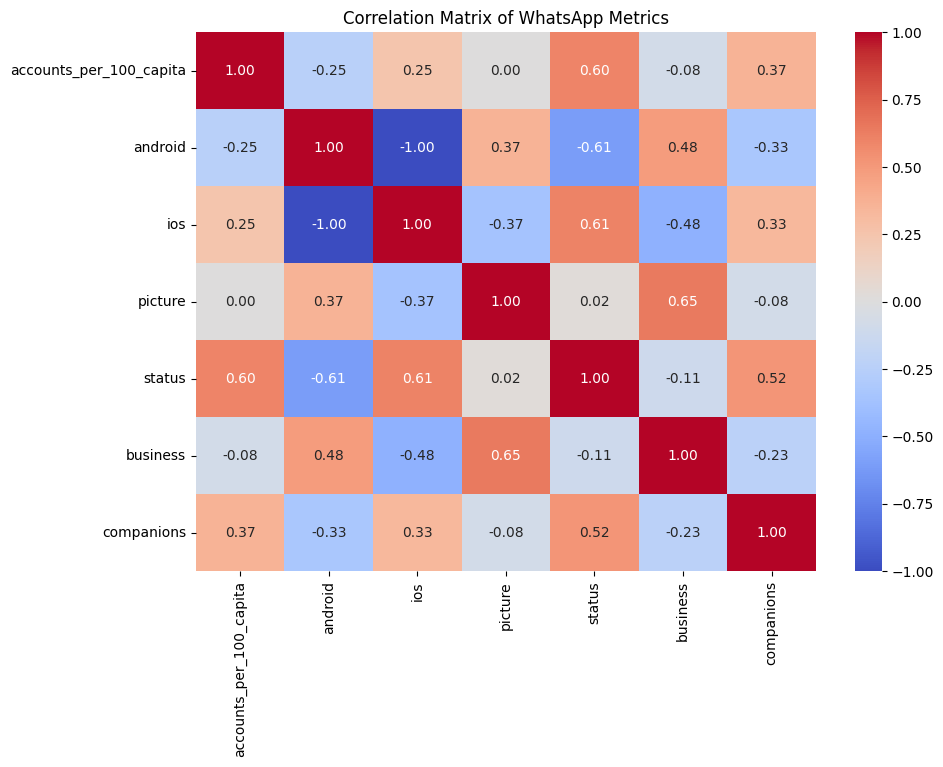

In [219]:
# Compare continents for OS, privacy, companions.
numeric_cols = ['accounts_per_100_capita', 'android', 'ios', 'picture', 'status', 'business', 'companions']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix of WhatsApp Metrics")
plt.savefig("Charts/Correlation Matrix of WhatsApp Metrics.png", dpi=300)
plt.show()